# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32,32,3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizations will be shown in the notebook.

# Load sign names
### Note: python3 numpy differentiate the 'byte string' by desplaying 'b' before string
signnames = np.genfromtxt("signnames.csv", names=True, delimiter=",", dtype=None)
sign_dict = dict()
for i in range(len(signnames)):
   sign_dict[signnames[i][0]] = signnames[i][1]

3
b'Speed limit (60km/h)'


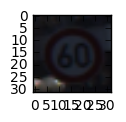

In [4]:
# Randomly show a sign
index = random.randint(0, n_train)
# index = random.sample(range(0, n_train),5)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(sign_dict[y_train[index]])

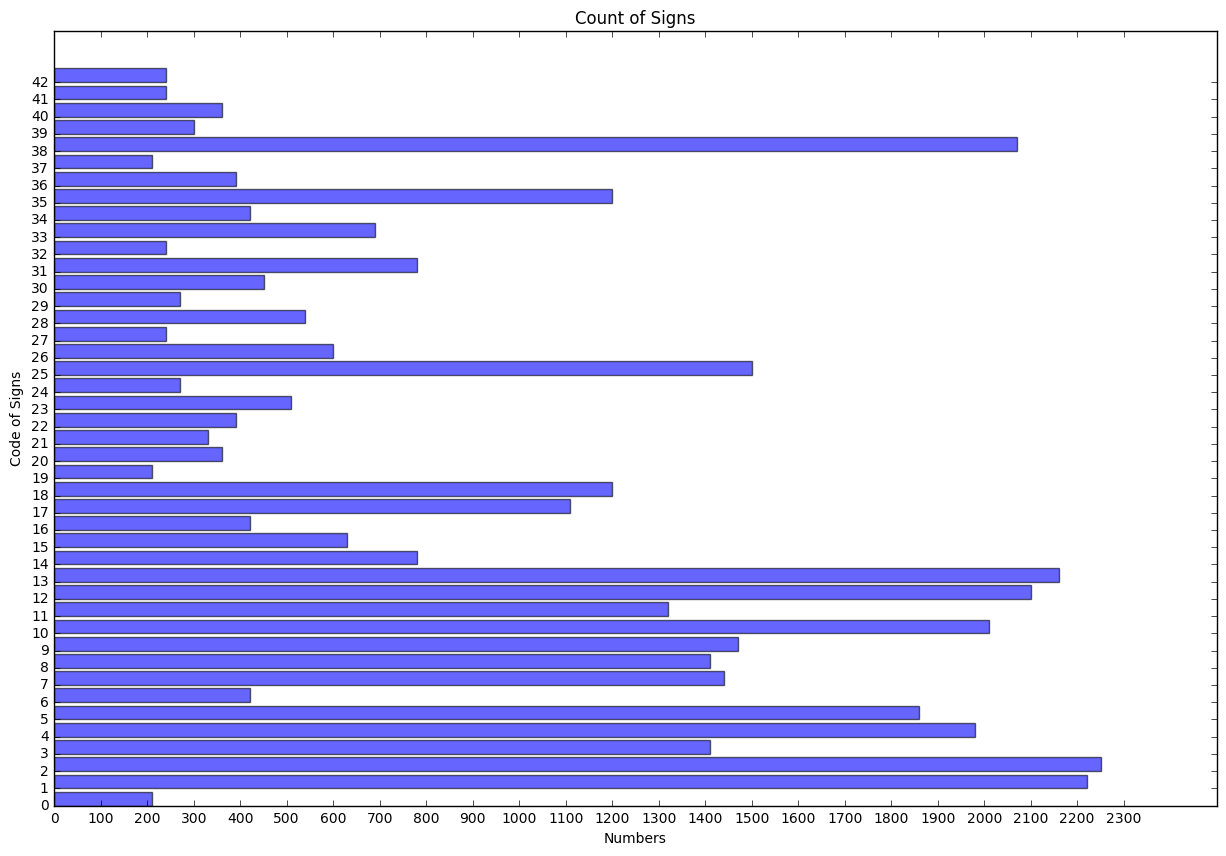

In [5]:
# Visualise the frequency of each sign
sign_code = np.unique(y_train)
y_pos = np.arange(len(sign_code))
count = np.bincount(y_train)

plt.figure(figsize=(15, 10))
plt.barh(y_pos, count, alpha = 0.6)
plt.yticks(y_pos, sign_code)
plt.xticks(np.arange(0, 2400, 100))
plt.xlabel("Numbers")
plt.ylabel("Code of Signs")
plt.title("Count of Signs")

plt.show()

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


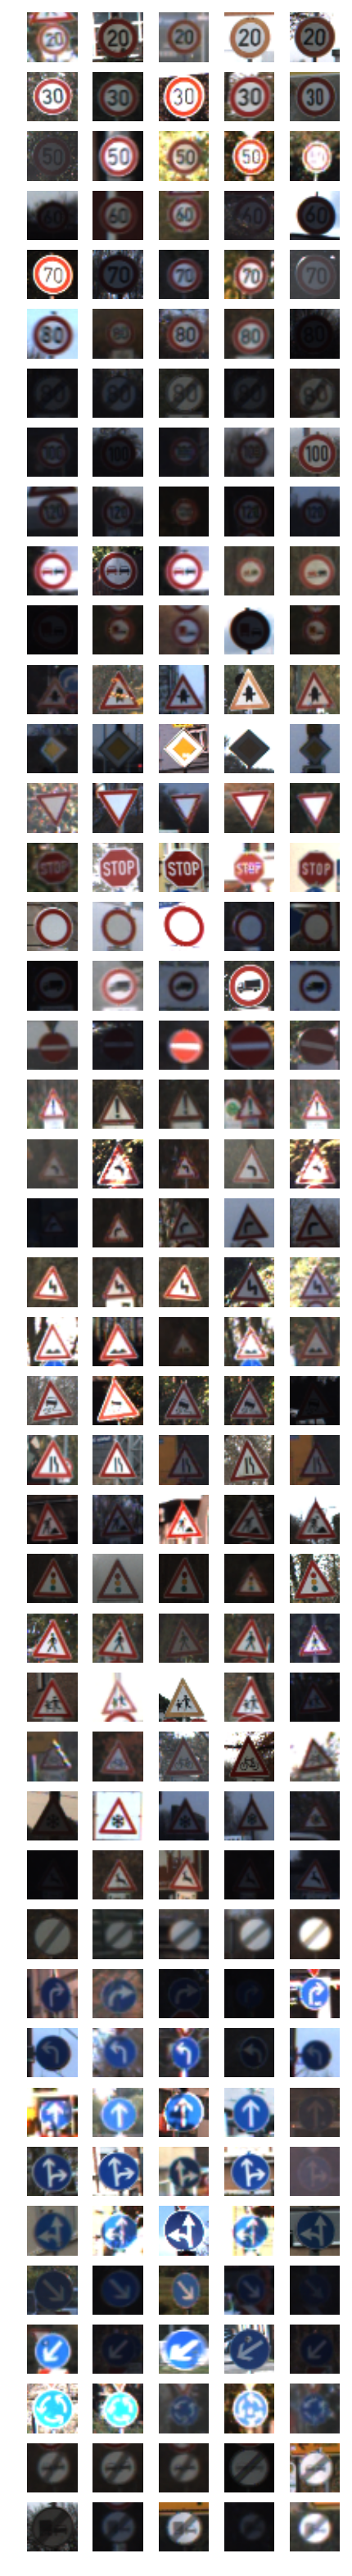

In [6]:
# Randomly display 5 images of each sign
### Source code from https://carnd-forums.udacity.com/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image

import matplotlib.gridspec as gridspec
ind_all = np.array([])

for s in sign_code:
    signs = np.argwhere(y_train == s)
    signs = np.array(signs).flatten()
    ind = np.random.choice(signs, 5, replace=False)
    ind_all = np.append(ind_all, ind)

gs1 = gridspec.GridSpec(43, 5)
gs1.update(wspace=0.0001, hspace=0.0002) # set the spacing between axes. 
plt.figure(figsize=(5,40))

for i in range(len(ind_all)):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = X_train[(ind_all[i])].squeeze()
    
    plt.subplot(43,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Feature scaling

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for image data
    a = 0.1
    b = 0.9
    x_min = 0
    x_max = 255
    return a + (image_data-x_min)*(b-a)/(x_max-x_min)

X_train = normalize(X_train)
X_test = normalize(X_test)

### Shuffle the training data.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. Normalise the data. Rescaling RGB values with Min-Max scaling in three RGB channels. The objective is to decrease the effect of extreme values on the training process.
2. Shuffle the training data, to avoid the training process take the order of images as important weights.

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split training data into validation sets
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
print("Training Set Size: {}".format(X_train.shape[0]))
print("Validation Set Size: {}".format(X_validation.shape[0]))
print("Updated Image Shape: {}".format(X_train.shape[1:]))

Training Set Size: 31367
Validation Set Size: 7842
Updated Image Shape: (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Split 20% training data randomly into *X_validation* as the validation set. Keep the name *X_train* and *X_test* for training and testing sets.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [11]:
# Architecture
def conv_net(x, dropout):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    
    # Apply Dropout
    fc2_drop = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    out = tf.matmul(fc2_drop, fc3_W) + fc3_b
   
    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Implement modified [LeNet-5](http://yann.lecun.com/exdb/lenet/) **convolutional neural network** architecture. 

The architecture has 5 layers, being composed of **ReLU** as the *activation*, **Max-Pool** to *dwonsamle* the features, and **Dropout** to avoid the overfitting. The architecture follows the pattern:

```
INPUT -> [CONV -> RELU -> POOL]*2 -> FLATTERN -> [FC -> RELU]*2 -> DROPOUT -> FC
```

#### Input
32x32x3 images, which 3 refers to the 3 channels of RGB colour.

#### Layers
**Layer 1 Convolutional** Filter shape is 5x5x32. Stride is 1x1 with 'VALID' padding method. 

**Activation** ReLU

**Pooling** 2x2 max-pooling. Output shape is 14x14x32


**Layer 2 Convolutional** Filter shape is 5x5x64. Stride is 1x1 with 'VALID' padding method. 

**Activation** ReLU

**Pooling** 2x2 max-pooling. Output shape is 5x5x64


**Flattern** Flat 3D features to 1D, the number of neurons are 5x5x65 = 1600.

`y = (W x X) + b`

**Layer 3 Fully Connected** the number of neurons for this layer is 1024.

**Activation** ReLU


**Layer 4 Fully Connected**  the number of neurons for this layer is 512.

**Activation** ReLU


**Dropout** Drop half of neurons connections from the network to avoid overfitting.


**Layer 5 Fully Connected** This layer uses 43 neurons to respond the 43 classes of the traffic sign.

**Activation** ReLU

In [12]:
# tf Graph input
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [13]:
# Parameters
rate = 0.001
epochs = 50
batch_size = 64
dropout = 0.5 # Dropout, probability to keep units

In [14]:
# Construct model
pred = conv_net(x,keep_prob)
result_pred = tf.argmax(pred, 1)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate=rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        ac = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (ac * len(batch_x))
    return total_accuracy / num_examples

In [15]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.948
Validation Accuracy = 0.944

EPOCH 2 ...
Training Accuracy = 0.980
Validation Accuracy = 0.975

EPOCH 3 ...
Training Accuracy = 0.991
Validation Accuracy = 0.985

EPOCH 4 ...
Training Accuracy = 0.994
Validation Accuracy = 0.986

EPOCH 5 ...
Training Accuracy = 0.992
Validation Accuracy = 0.984

EPOCH 6 ...
Training Accuracy = 0.997
Validation Accuracy = 0.992

EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.988

EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.988

EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.990

EPOCH 10 ...
Training Accuracy = 0.995
Validation Accuracy = 0.989

EPOCH 11 ...
Training Accuracy = 0.997
Validation Accuracy = 0.991

EPOCH 12 ...
Training Accuracy = 0.998
Validation Accuracy = 0.992

EPOCH 13 ...
Training Accuracy = 0.996
Validation Accuracy = 0.990

EPOCH 14 ...
Training Accuracy = 0.998
Validation Accuracy = 0.992

EPOCH 15 ...
Training Accuracy = 0.997
Valid

In [16]:
# Model Evaluation with Test Set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

This model uses *Adam* **optimizer** with the *Learning Rate* equaling to 0.001. Adam optimisation is also a stochastic gradient-based algorithm, which operates to minimise the loss of *cross-entroy*. The **batch size** for training is 64 and **epochs** are 50 with the power of AWS GPU.

The initial *weights* are generated randomly by using `mu(mean) = 0` and `sigma(standard deviation) = 0.1` normal distribution, and the *biases* are initially set to be 0. The probability of keeping neurons before the last fully-connected layer is 50%.

In this model, I choose both training set and validation set to validate the model, with a testing set to evaluate the performance in the real world. In case of overfitting the training set, I split 20% training data into validation set. After 50 epochs training, the accuracy of the model for training set is 100% fit, and the validation accuracy can achieve 99%. In addition, the evaluation of the model with a separate testing data gets 95% accuracy, which is a satisfied result.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I implemented LeNet-5 architecture for this problem, as it is a solid CNN architecture and performs well in similar tasks. The problem requires a model to classify the traffic signs, which is the same image recognition process as the MNIST. Two convolutional layers could effectively decrease the parameters used in the model and keep the result accurate. I increased the depth of the first two layers and enlarge the neurons of the fully connected layers, because the signs and the final classes of this project are more complicated. Increasing parameters could help the model to solve the data. To avoid model overfitting, dropout technique was implemented to disturb the neuron connections at the last two layers. The result of validation and training accuracies shows the model is fitted to the data, and the testing accuracy also presents its feasibility to recognise the traffic sign in the real-world.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

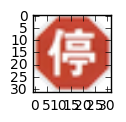

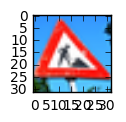

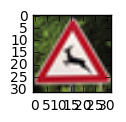

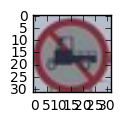

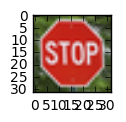

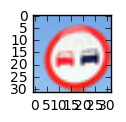

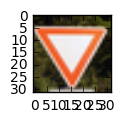

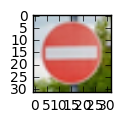

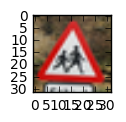

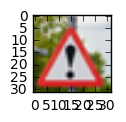

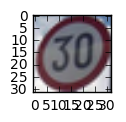

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg
from PIL import Image

images = [f for f in os.listdir("test_images/") if f[-3:] == 'png']

X_image = []
for n in range(len(images)):
    plt.figure(figsize=(1,1))
    image = Image.open("test_images/"+images[n])
    image.thumbnail((32, 32), Image.ANTIALIAS)
    im = np.array(image)
    X_image.append(im)
    plt.imshow(image)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

11 traffic signs were selected from the Internet. All images were cropped to focus on the traffic signs and resized before the recognising process. There are three qualities that might affect the accuracy of the model. Firstly, transformed images might make classification difficult, such as second and the last signs; secondly, watermark on the sixth image possibly disturb the recognition process; finally, one image ("Children") is mirror symmetrical against the training image. In addition, I introduced two local images from China that don't belong to 43 classes of the data, but they have similar patterns with the training data signs. Therefore, I use these 11 images to test the performance the trained model.

In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

X_ = np.array(X_image)
X_ = normalize(X_)

In [27]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))   
     
    prob = sess.run(pred,feed_dict={x: X_, keep_prob: 1.})    
    out = sess.run(result_pred, feed_dict={x: X_, keep_prob: 1.})

b'Speed limit (50km/h)'
b'Road work'
b'Wild animals crossing'
b'No passing for vehicles over 3.5 metric tons'
b'Stop'
b'No passing'
b'Yield'
b'No entry'
b'Right-of-way at the next intersection'
b'General caution'
b'Speed limit (30km/h)'


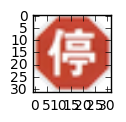

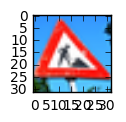

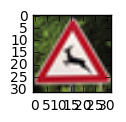

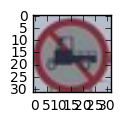

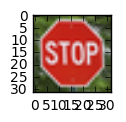

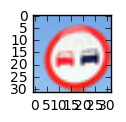

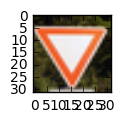

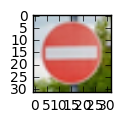

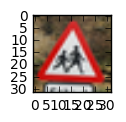

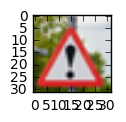

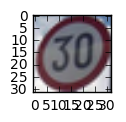

In [28]:
# Display the predicition's classes and images
for i in range(len(out)):
    plt.figure(figsize=(1,1))
    plt.imshow(X_image[i])
    print(sign_dict[out[i]])

In [25]:
print("Accuracy: ", 9/11)

Accuracy:  0.8181818181818182


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Comparing to the testing on the dataset, the model performed fairly well. The accuracy of the predictions is about 82%. This result takes account of the two Chinese local traffic signs. The model classified "No passing for three-wheel vehicles" sign into "No passing for vehicles over 3.5 metric tons" class, which actually recognised the "forbidden" function of this sign. It could be considered to be "half correct" `(^_^!)`. If excluding these two images, the model classified all signs correctly as it has been trained.

In [36]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

a = np.array(prob)

with tf.Session() as sess:
    certain = sess.run(tf.nn.top_k(tf.constant(a), k=3))
    print(certain)

TopKV2(values=array([[  24.84693909,    7.03226089,   -5.23186111],
       [  65.53470612,   13.37493038,   11.20798206],
       [  81.82449341,   13.44979668,    1.12669885],
       [  38.33014297,   30.2949543 ,   23.82971764],
       [  94.28522491,   -4.19460583,   -9.76068211],
       [  64.57686615,   16.48748207,    7.30042791],
       [ 120.75619507,  -14.34457016,  -25.03819847],
       [ 210.86372375,   11.09146786,  -40.80456543],
       [  14.1187582 ,    9.81370831,    0.4879939 ],
       [ 139.2124939 ,    0.76920223,  -20.83776474],
       [  55.12543488,    7.30950737,  -16.11482811]], dtype=float32), indices=array([[ 2,  1, 15],
       [25, 30, 31],
       [31,  5,  3],
       [10,  9, 35],
       [14, 17,  1],
       [ 9,  3, 35],
       [13,  9, 14],
       [17,  1, 26],
       [11,  3, 41],
       [18,  1, 27],
       [ 1,  2,  6]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Certainty check by softmax probabilities shows the same results as the previous test. For the signs from the 43 classes, the model presents high certatinty of its predictions. Conversly, the model shows uncertainty for its prediction on "No passing for three-wheel veichles", which it didn't meet the same sign during the training, and the sign that the model guessed is close to the shape of this image, even with the human visual recognition. Interesting, the model has stong believes in its predictions on the first image, which is a "Stop" sign in Chinese character. However, the all of most three possiblities about this sign don't contain "Stop" sign class ID. It might be caused by the different composition between Chinese and English words.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.